In [63]:
!pip install catboost

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import catboost as ctb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
plt.style.use("ggplot")
import catboost as ctb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [65]:
#loading the dataset
df = pd.read_csv('new_placementdata.csv')
df.head(3)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1


In [66]:
#checking out the data
df.shape

(2966, 8)

In [67]:
#any missing values?
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [69]:
#statistical summaries
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [70]:
#checking distribution
#1--> placed
#0--> notplaced
df['PlacedOrNot'].value_counts()

1    1639
0    1327
Name: PlacedOrNot, dtype: int64

In [71]:
#changing the gender to numerical values
df.replace({'Gender':{'Female':0,'Male':1}},inplace = True)
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1,1
1,21,0,Computer Science,0,7,1,1,1
2,22,0,Information Technology,1,6,0,0,1
3,21,1,Information Technology,0,8,0,1,1
4,22,1,Mechanical,0,8,1,0,1


# Graphics

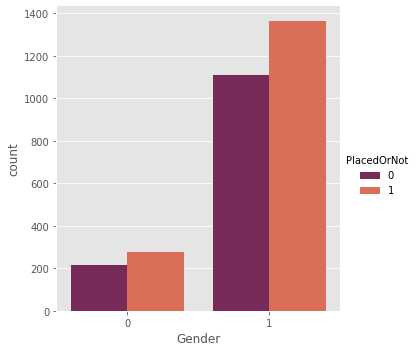

In [72]:
sns.catplot('Gender',data=df,kind='count',hue='PlacedOrNot',palette='rocket')


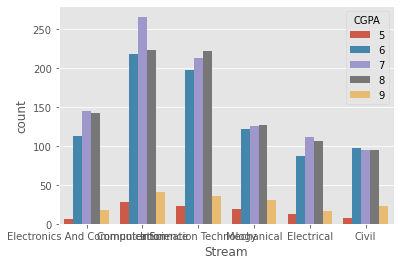

In [73]:
sns.countplot(x='Stream', hue='CGPA', data=df)


In [74]:
fig = px.histogram(df, x="Gender", color ="PlacedOrNot", pattern_shape="PlacedOrNot",
                   template='plotly_white', barmode='group',color_discrete_sequence=['greenyellow'])

fig.update_layout(bargap=0.2)

fig.show()

In [75]:
fig = px.histogram(df, x="Internships", color ="PlacedOrNot", pattern_shape="PlacedOrNot",color_discrete_sequence=['greenyellow'],
                   template='plotly_white', barmode='group')

fig.update_layout(bargap=0.2)

fig.show()

In [76]:
fig = px.histogram(df, x="HistoryOfBacklogs", color ="PlacedOrNot", pattern_shape="PlacedOrNot",
                   template='plotly_white', barmode='group',color_discrete_sequence=['greenyellow'])

fig.update_layout(bargap=0.2)

fig.show()

# TRAINING DATASET

In [77]:
#getting our X and Y datasets
X = df.drop(columns = ['Stream','PlacedOrNot'],axis = 1)
Y = df['PlacedOrNot']
print(X.shape,Y.shape)

(2966, 6) (2966,)


In [78]:
#splitting into testing and training
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1 , stratify = Y, random_state = 2)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2669, 6) (297, 6) (2669,) (297,)


Logistic Regression Model

In [79]:
#training our model
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [80]:
#forming predictions on our X_train
training_pred = model.predict(X_train)
score_1 = accuracy_score(Y_train,training_pred)
print('Accuracy score on training data using Linear Regression:',(score_1)*100)

Accuracy score on training data using Linear Regression: 76.84526039715249


In [81]:
#testing data
testing_pred = model.predict(X_test)
score_2 = accuracy_score(Y_test,testing_pred)
print('Accuracy score on training data using Linear Regression:',(score_2)*100)

Accuracy score on training data using Linear Regression: 77.10437710437711


**SUPPORT VECTOR MODEL**

In [82]:
model = svm.SVC(kernel = 'linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [83]:
#forming predictions on our X_train
training_pred = model.predict(X_train)
score_1 = accuracy_score(Y_train,training_pred)
print('Accuracy score on training data using SVM:',(score_1)*100)

Accuracy score on training data using SVM: 77.21993255901086


In [84]:
#testing data
testing_pred = model.predict(X_test)
score_2 = accuracy_score(Y_test,testing_pred)
print('Accuracy score on training data using SVM:',(score_2)*100)

Accuracy score on training data using SVM: 78.11447811447812


**XGBOOST**

In [85]:
model_xgb = xgb.XGBClassifier(
 learning_rate =0.3,
 n_estimators=190,
 max_depth=6,
 objective= 'binary:logistic',
 scale_pos_weight=0.47,
 seed=27,
 use_label_encoder=False)
model_xgb.fit(X_train, Y_train)

XGBClassifier(learning_rate=0.3, max_depth=6, n_estimators=190,
              scale_pos_weight=0.47, seed=27, use_label_encoder=False)

In [86]:
#forming predictions on our X_train
training_pred = model_xgb.predict(X_train)
score_1 = accuracy_score(Y_train,training_pred)
print('Accuracy score on training data using XGB:',(score_1)*100)

Accuracy score on training data using XGB: 88.72236792806294


In [87]:
#testing data
testing_pred = model_xgb.predict(X_test)
score_2 = accuracy_score(Y_test,testing_pred)
print('Accuracy score on training data using XGB:',(score_2)*100)

Accuracy score on training data using XGB: 88.21548821548821


# KNN

In [88]:
from sklearn.preprocessing import LabelEncoder


In [89]:
le = LabelEncoder()


In [90]:

for i in df:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,3,1,3,1,3,1,1,1
1,2,0,1,0,2,1,1,1
2,3,0,4,1,1,0,0,1
3,2,1,4,0,3,0,1,1
4,3,1,5,0,3,1,0,1


In [91]:
x = df.drop('PlacedOrNot',1)
y = df['PlacedOrNot']

In [92]:
from sklearn.model_selection import train_test_split


In [93]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [95]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

#KNeighborsClassifier type 1


In [96]:
knn.fit(xtrain,ytrain)
knn.predict(xtest)
print("Accuracy:",knn.score(xtest,ytest))

Accuracy: 0.8595505617977528


#KNeighborsClassifier type 2


In [97]:
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print("Accuracy",accuracy_score(ypred,ytest))

Accuracy 0.8595505617977528


# Gaussian Naive Bayes

#GaussianNB type 1

In [98]:
gb.fit(xtrain,ytrain)
gb.predict(xtest)
gb.score(xtest,ytest)

0.7910112359550562

#GaussianNB type 2


In [99]:
gb.fit(xtrain,ytrain)
ypred = gb.predict(xtest)
accuracy_score(ypred,ytest)

0.7910112359550562

# Neural Network

In [100]:
from sklearn.neural_network import MLPClassifier

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 1)

In [102]:
print(X.shape, X_train.shape,X_test.shape)

(2966, 6) (2372, 6) (594, 6)


In [103]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Neural Network' : MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    print(name + ' trained!')

Logistic Regression trained!
Decision Tree trained!
Random Forest trained!
Neural Network trained!


In [104]:
for name, model in models.items():
    score = model.score(X_test, Y_test)
    print(name + ' Accuracy is: {:.2f}%'.format(score * 100))

Logistic Regression Accuracy is: 77.27%
Decision Tree Accuracy is: 87.21%
Random Forest Accuracy is: 87.71%
Neural Network Accuracy is: 83.67%


# K FOld Classification

In [105]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [106]:
for train_index,test_index in kf.split(x,y):
    print(train_index,test_index)

[ 989  990  991 ... 2963 2964 2965] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [108]:
x,y=make_classification(n_samples=100,n_features=20,n_informative=15,n_redundant=5,random_state=1)

cv=KFold(n_splits=3,random_state=1,shuffle=True)

scores=cross_val_score(DecisionTreeClassifier(),x,y,scoring='accuracy',cv=cv,n_jobs=-1)

In [109]:
scores

array([0.64705882, 0.6969697 , 0.6969697 ])

In [110]:
print("Accuracy: ",np.mean(scores))

Accuracy:  0.6803327391562686


In [111]:
li = [lr,rn,dt,knn,gb]                   # ML in most easiest way (in single cell) -- basic level of ml
for i in li: 
    print(i)
    i.fit(xtrain,ytrain)
    i.predict(xtest)
    print('accuracy:',i.score(xtest,ytest))
    if i==gb:
        continue
    print('*'*29)

LogisticRegression()
accuracy: 0.7370786516853932
*****************************
RandomForestClassifier()
accuracy: 0.8707865168539326
*****************************
DecisionTreeClassifier()
accuracy: 0.8696629213483146
*****************************
KNeighborsClassifier()
accuracy: 0.8595505617977528
*****************************
GaussianNB()
accuracy: 0.7910112359550562
